In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit
import scipy

from NUC_functions import create_NUC_df, collapse_df,compile_NUC_matrix_input,calc_NUC_coef

# Seaborn for plotting and styling
import seaborn as sns
sns.set_theme()

In [2]:
#choose filepath to desired data
path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/NUC/dec15/'
cal_file1 = 'cam1hot.h5'
cal_file2 = 'cam2hot.h5'

In [3]:
#will create a df and print the names of the keys in the original hdf5 file
df1 = create_NUC_df(path,cal_file1)
df2 = create_NUC_df(path,cal_file2)
df2

,images1,temp1
0,"[[24137, 24142, 24138, 24145, 24108, 24131, 24...",13.8
1,"[[24019, 24018, 24006, 24023, 24015, 24040, 24...",13.9
2,"[[24065, 24077, 24091, 24076, 24074, 24075, 24...",14.1
3,"[[23974, 23965, 23972, 23965, 23967, 23964, 23...",14.2
4,"[[23872, 23859, 23845, 23862, 23857, 23865, 23...",14.4
...,...,...
95,"[[22681, 22667, 22678, 22660, 22686, 22679, 22...",21.2
96,"[[22675, 22652, 22663, 22665, 22662, 22667, 22...",21.2
97,"[[22694, 22665, 22655, 22662, 22675, 22664, 22...",21.2
98,"[[22659, 22653, 22661, 22669, 22667, 22661, 22...",21.2


In [4]:
#select ROI
ymin1 = 100; ymax1 = 145;
ymin2 = 125; ymax2 = 170;

temps = [35,40,45,50,55,60,70,75]

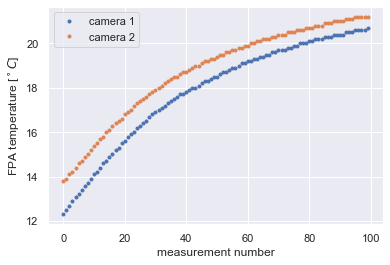

In [5]:
plt.plot(df1['temp1'],'.',label='camera 1')
plt.plot(df2['temp1'],'.',label='camera 2')
plt.xlabel('measurement number')
plt.ylabel('FPA temperature [$^\circ C$]')
plt.legend()
plt.show()

In [6]:
# pixel fit 
def f(T, m, b,rc): # this is your 'straight line' y=f(x)
    dt = 21 - T; #delta T,T ref is 21
    return A*x**2 + B

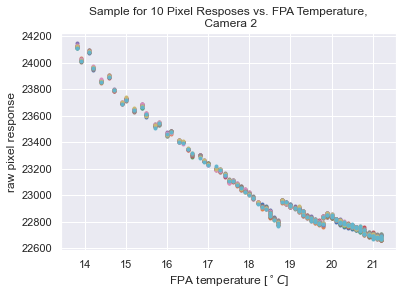

In [7]:
for j in range(10):
    values = np.zeros(100)
    for i in range(100):
        im = df2['images1'][i];
        values[i] = im[7+j,10]
    plt.plot(df2['temp1'],values,'.')

plt.xlabel('FPA temperature [$^\circ C$]')   
plt.ylabel('raw pixel response')
plt.title('Sample for 10 Pixel Resposes vs. FPA Temperature,\n Camera 2')
plt.show()    


In [8]:
bbtemps1 = [];bbtemps2 = []; temps1 =[];temps2 = []; images1 =[]; images2 = [];

for t in temps:
    #choose filepath to desired data
    path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_data/LUT/'
    cal_file1 = 'cam1_'+str(t)+'.h5'
    cal_file2 = 'cam2_'+str(t)+'.h5'
    df1 = create_NUC_df(path,cal_file1)
    df2 = create_NUC_df(path,cal_file2)
    t1,i1 = collapse_df(df1)
    t2,i2 = collapse_df(df2)
    bbtemps1.extend(np.ones(len(t1))*t)
    bbtemps2.extend(np.ones(len(t2))*t)
    temps1.extend(t1)
    temps2.extend(t2)
    images1.extend(i1)
    images2.extend(i2)
        

In [9]:
data1= {'bbtemp': bbtemps1, 'temps1': temps1,'images1':list(images1)}
data2= {'bbtemp': bbtemps2, 'temps1': temps2,'images1':list(images2)}
len(bbtemps1)

13

In [10]:
cam1 = pd.DataFrame.from_dict(data1)
cam2 = pd.DataFrame.from_dict(data2)

In [11]:
cam2

,bbtemp,temps1,images1
0,35.0,22.1,"[[22448.0, 22457.0, 22465.0, 22470.0, 22474.0,..."
1,35.0,22.2,"[[22399.0, 22402.0, 22410.0, 22418.0, 22424.0,..."
2,40.0,22.2,"[[22432.0, 22442.0, 22457.0, 22456.0, 22452.0,..."
3,40.0,22.1,"[[22431.0, 22440.0, 22454.0, 22452.0, 22451.0,..."
4,45.0,22.1,"[[22508.0, 22491.0, 22514.0, 22509.0, 22511.0,..."
5,45.0,22.2,"[[22419.0, 22418.0, 22438.0, 22439.0, 22438.0,..."
6,50.0,22.2,"[[22431.0, 22413.0, 22433.0, 22426.0, 22433.0,..."
7,55.0,22.2,"[[22453.0, 22468.0, 22474.0, 22465.0, 22469.0,..."
8,55.0,22.1,"[[22488.0, 22527.0, 22529.0, 22500.0, 22521.0,..."
9,60.0,22.2,"[[22432.0, 22460.0, 22456.0, 22448.0, 22454.0,..."


In [12]:
avg1 = cam1['images1'].map(lambda x: x.mean())
avg2 = cam2['images1'].map(lambda x: x.mean())

cam1['avg']=avg1
cam2['avg']=avg2

Text(0.5, 0, 'Avg. .tiff ')

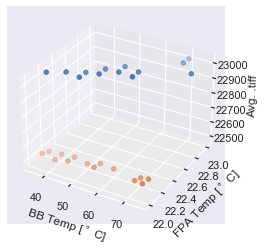

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cam1['bbtemp'], cam1['temps1'], cam1['avg'])
ax.scatter(cam2['bbtemp'], cam2['temps1'], cam2['avg'])
ax.set_xlabel('BB Temp [$^\circ$ C]')
ax.set_ylabel('FPA Temp [$^\circ$ C]')
ax.set_zlabel('Avg. .tiff ')

In [14]:
T_ref, tFPAS, rs = compile_NUC_matrix_input(cam1)
T_ref2, tFPAS2, rs2 = compile_NUC_matrix_input(cam2)

In [15]:
ymin1 = 105; ymax1 = 140;
ymin2 = 130; ymax2 = 165;

m1 = np.zeros([256,320]); b1= np.zeros([256,320]);

for i in range(320):
    for j in range(256):
        m,b = calc_NUC_coef(tFPAS,rs,i,j)
        m1[j,i] = m
        b1[j,i] = b

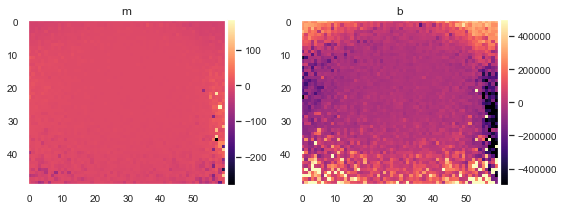

In [16]:
plt.rcParams["axes.grid"] = False
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('figure', titlesize=50)  # fontsize of the figure title

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

ax1, ax2 = axes

im1 = ax1.imshow(m1[100:150,105:165],cmap ='magma')#,vmin = -40, vmax = 40)
im2 = ax2.imshow(b1[100:150,105:165],cmap ='magma',vmin =-0.5e6,vmax =0.5e6)

ax1.title.set_text('m')
ax2.title.set_text('b')

fig.colorbar(im1, ax=ax1,fraction=0.04, pad=0.01)
fig.colorbar(im2, ax=ax2,fraction=0.04, pad=0.01)

fig.tight_layout()

plt.show()


In [17]:
m2 = np.zeros([256,320]); b2= np.zeros([256,320]);

for i in range(320):
    for j in range(256):
        m,b = calc_NUC_coef(tFPAS2,rs2,i,j)
        m2[j,i] = m
        b2[j,i] = b

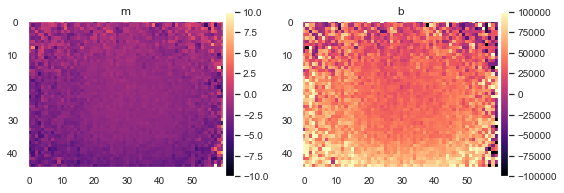

In [18]:
plt.rcParams["axes.grid"] = False
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('figure', titlesize=50)  # fontsize of the figure title

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

ax1, ax2 = axes

im1 = ax1.imshow(m2[120:165,100:160],cmap ='magma',vmin = -10,vmax = 10)
im2 = ax2.imshow(b2[120:165,100:160],cmap ='magma',vmin = -1e5,vmax = 1e5)

ax1.title.set_text('m')
ax2.title.set_text('b')

fig.colorbar(im1, ax=ax1,fraction=0.04, pad=0.01)
fig.colorbar(im2, ax=ax2,fraction=0.04, pad=0.01)

fig.tight_layout()

plt.show()


In [19]:
#writetohdf5

#choose filepath to desired data
save_path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_files/'
name =  "NUC" 

#create hdf5 file
hf = h5py.File(save_path + name + '.h5', 'w')
hf.create_dataset('/m1',  data=m1)
hf.create_dataset('/b1',  data=b1)
hf.create_dataset('/T_ref1',  data=T_ref)
hf.create_dataset('/m2',  data=m2)
hf.create_dataset('/b2',  data=b2)
hf.create_dataset('/T_ref2',  data=T_ref2)
hf.close()